In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_parquet('./data/green_tripdata_2021-01.parquet')

df.lpep_dropoff_datetime =pd.to_datetime(df.lpep_dropoff_datetime)
df.lpep_pickup_datetime =pd.to_datetime(df.lpep_pickup_datetime)

df['duration']=df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td : td.total_seconds()/60)

df =df[(df.duration >=1) & (df.duration<=60)]

categorical = ['PULocationID' , 'DOLocationID']
numerical = ['trip_distance']

df[categorical]=df[categorical].astype(str)

In [6]:
#training_pipeline
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
x_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

#training_model part
lr = LinearRegression()
lr.fit(x_train, y_train)

#predicting
y_pred = lr.predict(x_train)

#evalusation part
mean_squared_error(y_train,y_pred, squared =False)

9.838799799829578

In [7]:
x_train

<73908x507 sparse matrix of type '<class 'numpy.float64'>'
	with 221724 stored elements in Compressed Sparse Row format>

/home/mlops_zoomcamp/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mlops_zoomcamp/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


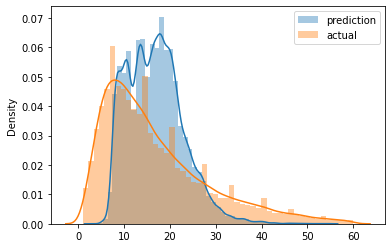

In [8]:
sns.distplot(y_pred , label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

9.838799799829578

In [9]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df.lpep_dropoff_datetime =pd.to_datetime(df.lpep_dropoff_datetime)
    df.lpep_pickup_datetime =pd.to_datetime(df.lpep_pickup_datetime)
    
    df['duration']=df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td : td.total_seconds()/60)

    df =df[(df.duration >=1) & (df.duration<=60)]

    categorical = ['PULocationID' , 'DOLocationID']

    df[categorical]=df[categorical].astype(str)
    
    return df

In [10]:
df_train = read_dataframe('./data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('./data/green_tripdata_2021-02.parquet')

In [11]:
len(df_train),len(df_val)

(73908, 61921)

In [12]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [13]:
categorical = ['PU_DO'] #['PULocationID' , 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()
             
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')             
X_val = dv.transform(val_dicts)

In [62]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [64]:
lr = LinearRegression()
lr.fit(X_train, y_train)

#predicting
y_pred = lr.predict(X_val)

#evalusation part
mean_squared_error(y_val,y_pred, squared =False)

7.758715207562129

In [66]:
with open('models/lin_reg.bin','wb') as f_out:
    pickle.dump((dv,lr),f_out)

In [56]:
lr = Lasso(alpha=1)
lr.fit(X_train, y_train)

#predicting
y_pred = lr.predict(X_val)

#evalusation part
mean_squared_error(y_val,y_pred, squared =False)

12.212583224318818

In [58]:
lr = Ridge()
lr.fit(X_train, y_train)

#predicting
y_pred = lr.predict(X_val)

#evalusation part
mean_squared_error(y_val,y_pred, squared =False)

10.860753390351968